Answer all questions and submit them either as an IPython notebook, LaTeX document, or Markdown document. Each question is worth 25 points.

This homework is due Tuesday, October 25, 2016.

In [2]:
%matplotlib inline
import numpy as np
import pylab as plt
import pandas as pd

# Set seed
np.random.seed(10011)

# Question 1

Epidemiologists are interested in studying the sexual behavior of individuals at risk for HIV infection. Suppose 1500 gay men were surveyed and each was asked how many risky sexual encounters he had in the previous 30 days. Let $n_i$ denote the number of respondents reporting $i$ encounters, for $i = 1, \ldots , 16$. The DataFrame below contains these reponses:

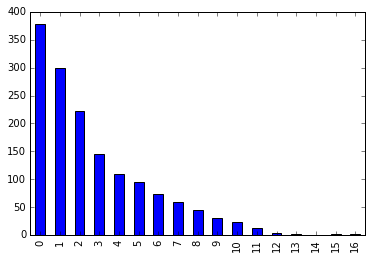

In [3]:
encounters = pd.DataFrame({'count': np.arange(17),
                          'freq': [379, 299, 222, 145, 109, 95, 73, 59,
                                  45, 30, 24, 12, 4, 2, 0, 1, 1]})

encounters.freq.plot.bar()

These data are poorly fitted by a Poisson model. It is more realistic to assume that the respondents comprise three groups. First, there is a group of people who, for whatever reason, report zero risky encounters even if this is not true. Suppose a respondent has probability $\alpha$ of belonging to this group. 

With probability $\beta$, a respondent belongs to a second group representing typical behavior. Such people respond truthfully, and their numbers of risky encounters are assumed to follow a $\text{Poisson}(\mu)$ distribution. 

Finally, with probability $1 − \alpha − \beta$, a respondent belongs to a high-risk group. Such people respond truthfully, and their numbers of risky encounters are assumed to follow a $\text{Poisson}(\lambda)$ distribution. 

The parameters in the model are $\alpha, \beta, \mu$ and $\lambda$. At the tth iteration of EM, we use $\theta^{(t)} = (\alpha^{(t)}, \beta^{(t)}, \mu^{(t)}, \lambda^{(t)})$ to denote the current parameter values. The likelihood of the observed data is given by:

$$L(\theta | n_0, \ldots, n_16) \propto \prod_{i=0}^{16} \left[ \frac{\pi_i(\theta)}{i!} \right]^{n_i}$$

where $\pi_i(\theta) = \alpha 1_{(i=0)} + \beta \mu^i \exp(-\mu) + (1-\alpha - \beta) \lambda^i \exp(-\lambda)$.

The observed data are in the `encounters` table above; the *complete* data may be construed to be $(n_{z,0}, n_{t,0}, n_{p,0}), \ldots, (n_{z,16}, n_{t,16}, n_{p,16})$, where $k = z, t, p$ correspond to zero, typical and promiscuous groups, respectively. That is, $n_0 = n_{z,0} + n_{t,0} + n_{p,0}$, and so on. Let $N = \sum_{i=0}^{16} n_i = 1500$.

Also define:

$$\begin{align}
z_0(\theta) &=& \frac{\alpha}{\pi_0(\theta)} \\
t_i(\theta) &=& \frac{\beta \mu^i \exp(-\mu)}{\pi_i(\theta)} \\
p_i(\theta) &=& \frac{(1-\alpha-\beta)\lambda^i \exp(-\lambda)}{\pi_i(\theta)}
\end{align}$$

which correspond to probabilities that respondents with $i$ risky encounters belong to various groups.

a. Show that the EM algorithm provides the following updates:

$$\begin{align}
\alpha^{(t+1)} &=& \frac{n_0 z_0(\theta^{(t)})}{N} \\
\beta^{(t+1)} &=& \sum_i \frac{n_i t_i(\theta^{(t)})}{N} \\
\mu^{(t+1)} &=& \frac{\sum_i i n_i t_i(\theta^{(t)})}{\sum_i n_i t_i(\theta^{(t)})} \\
\lambda^{(t+1)} &=& \frac{\sum_i i n_i p_i(\theta^{(t)})}{\sum_i n_i p_i(\theta^{(t)})}
\end{align}$$


b. Estimate the parameters of the model using the observed data.

### Question 1 - Part a

For the first part of question 1, we are deriving the EM algorithm updates for the unknown parameters.  The EM algorithm can be separated into two steps:

1) Expectation Step  
2) Maximization step  

**Expectation Step:**  
For the expectation step, we seek to determine $Q(\theta|\theta^{(t)})$, which is given by:

$$Q(\theta|\theta^{(t)}) = E_{z|x,\theta}[log(L(\theta|x,z))]$$  

Where $z$ are the unobserved variables, which for this problem are number of respondents in each group for each integer number of encounters i.e. $(n_{z,0}, n_{t,0}, n_{p,0}), \ldots, (n_{z,16}, n_{t,16}, n_{p,16})$, where $k = z, t, p$ correspond to zero, typical and promiscuous groups, respectively.

For the given problem, $Q$ is found as:

$$Q(\theta|\theta^{(t)}) \propto E_{z|x,\theta}\left[n_0log\left(\alpha + \beta \mu^i \exp(-\mu) + (1-\alpha - \beta) \lambda^i \exp(-\lambda)\right) + \sum_{i=1}^{16} \left[ n_ilog(\beta\mu^iexp(-\mu) + (1-\alpha-\beta)\lambda^iexp(-\lambda)) - n_ilog(i!) \right] \right]$$  

Which can be simplified to:  

$$Q(\theta|\theta^{(t)}) \propto E_{z|x,\theta} [n_0] \left( log\left(\alpha + \beta \mu^i \exp(-\mu) + (1-\alpha - \beta) \lambda^i \exp(-\lambda) \right) \right) + \sum_{i=1}^{16} \left[ E_{z|x,\theta} [n_i] log\left(\beta\mu^iexp(-\mu) + (1-\alpha-\beta)\lambda^iexp(-\lambda)\right) - E_{z|x,\theta} [n_i]log(i!) \right]$$ 

As given in the problem statement, we can define: 

$$\begin{align}
z_0(\theta) &=& \frac{\alpha}{\pi_0(\theta)} \\
t_i(\theta) &=& \frac{\beta \mu^i \exp(-\mu)}{\pi_i(\theta)} \\
p_i(\theta) &=& \frac{(1-\alpha-\beta)\lambda^i \exp(-\lambda)}{\pi_i(\theta)}
\end{align}$$

which correspond to probabilities that respondents with $i$ risky encounters belong to various groups. Such that 

$$\begin{align}
&E_{z|x,\theta} [n_{z,i}] = n_iz_i & \\
&E_{z|x,\theta} [n_{t,i}] = n_it_i & \\
&E_{z|x,\theta} [n_{p,i}] = n_ip_i &  
\end{align}$$

and then we can easily see:

$$\begin{align}
E_{z|x,\theta} [n_i] &= E_{z|x,\theta} \left[ n_{z,i} + n_{t,i} + n_{p,i}\right]& \\
&= E_{z|x,\theta} \left[ n_{z,i}\right] + E_{z|x,\theta} \left[ n_{t,i}\right] + E_{z|x,\theta} \left[ n_{p,i}\right]&\\
&= n_iz_i + n_it_i + n_ip_i&\\
&= n_i \left(z_i + t_i + p_i \right)&\\
&= n_i&
\end{align}$$  

Therefore, $Q(\theta|\theta^{(t)})$ is simply the log-likelihood:

$$Q(\theta|\theta^{(t)}) \propto n_0 \left[ log\left(\alpha + \beta \mu^i \exp(-\mu) + (1-\alpha - \beta) \lambda^i \exp(-\lambda) \right) \right] + \sum_{i=1}^{16} n_i \left[ log\left(\beta\mu^iexp(-\mu) + (1-\alpha-\beta)\lambda^iexp(-\lambda)\right) - log(i!) \right]$$ 


**Maximization Step:**  
For the expectation step, we seek to maximize $Q(\theta|\theta^{(t)})$, which is given by:

$$Q^{(t)} = argmax_\theta \left( Q \left(\theta|\theta^{(t)}\right) \right) $$

This is achieved by taking the derivative of $Q(\theta|\theta^{(t)})$ with respect to each of the unknown model parameters, setting those equations equal to zero, and solving for the parameters.

$$\begin{align}
&\frac {dQ}{d\alpha} = \frac {n_0} {\pi_0} - \sum_{i=0}^{16} n_i\left[ \frac {\lambda^iexp(-\lambda)}{\pi_i} \right] &\\
&\frac {dQ}{d\beta} = \sum_{i=0}^{16} n_i\left[ \frac {\mu^i exp(-\mu) - \lambda^i exp(-\lambda)}{\pi_i} \right] & \\
&\frac {dQ}{d\mu} = \sum_{i=0}^{16} n_i\left[ \frac {\beta i \mu^{i-1} exp(-\mu) - \beta \mu^i exp(-\mu)}{\pi_i} \right] &\\
&\frac {dQ}{d\lambda} = \sum_{i=0}^{16} n_i\left[ \frac {\left(1-\alpha-\beta \right) i \lambda^{i-1} exp(-\lambda) - \left(1-\alpha-\beta \right) \lambda^i exp(-\lambda)}{\pi_i} \right] &
\end{align}$$

These forms can be simplified using the formulas previously given for $z_i, t_i$ and $p_i$

$$\begin{align}
&\frac {dQ}{d\alpha} = \frac {n_0z_0} {\alpha} - \sum_{i=0}^{16} n_i\left[ \frac {p_i}{\left(1-\alpha-\beta \right)} \right] &\\
&\frac {dQ}{d\beta} = \sum_{i=0}^{16} n_i\left[ \frac {t_i}{\beta} - \frac {p_i}{\left(1-\alpha-\beta \right)} \right] &
\end{align}$$

By setting these two equations equal to zero, we can solve for $\alpha$ and $\beta$ as:

$$\begin{align}
\alpha^{(t+1)} &=& \frac{n_0 z_0(\theta^{(t)})}{N} \\
\beta^{(t+1)} &=& \sum_i \frac{n_i t_i(\theta^{(t)})}{N}
\end{align}$$

By noting that $\mu^{i-1} = \frac {\mu^i}{\mu}$ , we can simplify the third equation as:

$$\begin{align}
\frac {dQ}{d\mu} &= \sum_{i=0}^{16} n_i\left[ \frac {\beta i \mu^{i-1} exp(-\mu) - \beta \mu^i exp(-\mu)}{\pi_i} \right] &\\
& = \sum_{i=0}^{16} \left[ \frac {i n_i t_i}{\mu} - n_i t_i \right] &
\end{align}$$

Setting this equal to zero and solving for $\mu$, we find:

$$\mu^{(t+1)} = \frac{\sum_i i n_i t_i(\theta^{(t)})}{\sum_i n_i t_i(\theta^{(t)})}$$

Similarly, $\lambda^{i-1} = \frac {\lambda^i}{\lambda}$, so the fourth equation can be simplified as:

$$\begin{align}
\frac {dQ}{d\lambda} &= \sum_{i=0}^{16} n_i\left[ \frac {\left(1-\alpha-\beta \right) i \lambda^{i-1} exp(-\lambda) - \left(1-\alpha-\beta \right) \lambda^i exp(-\lambda)}{\pi_i} \right] &\\
& = \sum_{i=0}^{16} \left[ \frac {i n_i p_i}{\lambda} - n_i p_i \right] &
\end{align}$$

Again, setting this equal to zero and solving for $\lambda$, we find:

$$\lambda^{(t+1)} = \frac{\sum_i i n_i p_i(\theta^{(t)})}{\sum_i n_i p_i(\theta^{(t)})}$$

Therefore, the EM algorithm updates for the current problem have been shown to be consistent with the update formulas given in the problem statement:

$$\begin{align}
\alpha^{(t+1)} &=& \frac{n_0 z_0(\theta^{(t)})}{N} \\
\beta^{(t+1)} &=& \sum_i \frac{n_i t_i(\theta^{(t)})}{N} \\
\mu^{(t+1)} &=& \frac{\sum_i i n_i t_i(\theta^{(t)})}{\sum_i n_i t_i(\theta^{(t)})} \\
\lambda^{(t+1)} &=& \frac{\sum_i i n_i p_i(\theta^{(t)})}{\sum_i n_i p_i(\theta^{(t)})}
\end{align}$$


For more details on the above derivation, see the below linked PDF file:


In [1]:
#Display PDF file with detailed derivation for the update parameters
from IPython.display import IFrame
IFrame(".\images\BIOS 8366 HW2.pdf", width=1000, height=400)

### Question 1 - Part b

For the second part of question 1, we implement the EM algorithm to estimate the parameters using the observed data.

In [39]:
#Define E-Step
def e_step(alpha, beta, mu, lam):
    
    #Calculate the mixed distribution model pdf value
    pi_i = [alpha*(ii==0) + beta*mu**ii*np.exp(-mu) + (1-alpha-beta)*lam**ii*np.exp(-lam) for ii in range(17)]
    
    #Calculate probabilities for each group
    z_0 = alpha / pi_i[0]
    t_i = [beta*mu**ii*np.exp(-mu)/pi_i[ii] for ii in range(17)]
    p_i = [(1-alpha-beta)*lam**ii*np.exp(-lam)/pi_i[ii] for ii in range(17)]
    
    return z_0, t_i, p_i

In [40]:
#Define M-Step
def m_step(z_0, t_i, p_i, n_i):
    
    #Calculate total number of cases
    N = sum(n_i)
    
    #Update parameters
    alpha = n_i[0]*z_0 / N
    beta = np.sum(np.asarray(n_i) * np.asarray(t_i)) / N
    mu = np.sum(np.arange(17)*np.asarray(n_i)*np.asarray(t_i)) / (np.sum(np.asarray(n_i) * np.asarray(t_i)))
    lam = np.sum(np.arange(17)*np.asarray(n_i)*np.asarray(p_i)) / (np.sum(np.asarray(n_i) * np.asarray(p_i)))
              
    #Return as a tuple
    return alpha, beta, mu, lam

In [42]:
#EM Algorithm Function
def run_em(n_i, alpha0=0.3, beta0=0.3, mu0=0.4, lam0=0.3):
    
    #Initialize values
    alpha = alpha0
    beta = beta0
    mu = mu0
    lam = lam0

    # Stopping criterion
    crit = 1e-4

    # Convergence flag
    converged = False

    # Loop until converged
    while not converged:

        # E-step
        z,t,p = e_step(alpha, beta, mu, lam)
        # M-step
        alpha_new, beta_new, mu_new, lam_new = m_step(z, t, p, n_i)

        # Check convergence
        converged = ((np.abs(alpha_new - alpha) < crit) 
                     & (np.abs(beta_new - beta) < crit)
                     & (np.abs(mu_new - mu) < crit)
                     & (np.abs(lam_new - lam) < crit))
        alpha, beta, mu, lam = alpha_new, beta_new, mu_new, lam_new
                
    return alpha, beta, mu, lam

In [82]:
n_i = encounters.freq
alpha,beta,mu,lam = run_em(n_i)

#Output results
print('Expectation Maximimization Results')
print('\u03B1 = {0}'.format(alpha))
print('\u03B2 = {0}'.format(beta))
print('\u03BC = {0}'.format(mu))
print('\u03BB = {0}'.format(lam))

Expectation Maximimization Results
α = 0.12203226524939019
β = 0.31542710609090197
μ = 5.937846532292631
λ = 1.4666358479257904


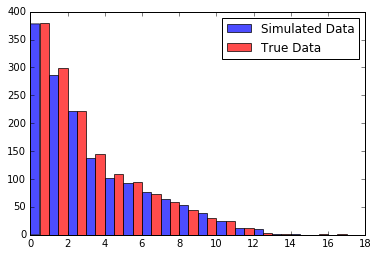

In [193]:
#Plot resultant model and compare with data!!!!
import matplotlib.pyplot as plt2

n = 1500

# Simulate from each distribution according to mixing proportion psi
dist_type = np.random.multinomial(n,[alpha,beta,(1-alpha-beta)])
x1 = np.zeros(dist_type[0])
x2 = np.random.poisson(mu, dist_type[1])
x3 = np.random.poisson(lam, dist_type[2])
x = np.concatenate((x1,x2,x3))

#True results
bar = np.arange(len(n_i))
bins = np.arange(17)
tmp = plt2.hist(x, bins, width = 0.5, alpha=0.7,  label='Simulated Data')
plt2.bar(tmp[1][0:17]+0.5, n_i, width=0.5, color="red", alpha=0.7, label='True Data')
plt2.legend()

### Results Discussion

The model parameters for the mixture distribution were determined from the EM algorithm.  To confirm their accuracy, a sample data set was simulated using the model and the results were compared with the true results.  It can be seen that the simulated results closely match the true results, indicating that the model parameters were correctly calibrated using the EM method.

# Question 2

Suppose $y$ has a binomial distribution with parameters $n$ and $p$, and we are interested in the log-odds value $\theta = \log(p/(1 − p))$. Our prior for $\theta$ is that $\theta \sim N(\mu, \sigma^2)$. It follows that the posterior density of $\theta$ is given, up to a proportionality constant, by:

$$\pi(\theta | y) \propto \frac{\exp(y\theta)}{(1 + exp(\theta))^n} \exp\left[\frac{-(\theta − \mu)^2}{2\sigma^2}\right]$$

For example, suppose we are interested in learning about the probability that a possibly-biased coin lands heads when tossed. *A priori* we believe that the coin is fair, so we assign $\theta$ a $N(0,.25)$ prior. We toss the coin $n = 5$ times and obtain $y = 5$ heads.

1. Using a normal approximation to the posterior density, compute the probability that the coin is biased toward heads (i.e., that θ is positive).
2. Using the prior density as a proposal density, design a rejection algorithm for sampling from the posterior distribution. Using simulated draws from your algorithm, approximate the probability that the coin is biased toward heads.
3. Using the prior density as a proposal density, simulate values from the posterior distribution using the SIR algorithm. Approximate the probability that the coin is biased toward heads.

### Question 2 - Part 1
Using a normal approximation to the posterior density, compute the probability that the coin is biased toward heads (i.e., that θ is positive).

In [2]:
#Approximate the posterior for theta using a normal distribution (see example from lecture)

#Define function for calculating unnormalized posterior
def theta_post(params, n, y, mu, sig):

    theta = params
    post = (np.exp(y*theta) / (1+np.exp(theta))**n) * np.exp(-(theta-mu)**2/(2*sig**2))

    return post


In [39]:
#Use scipy optimize to find the normal approximation to the posterior
from scipy.optimize import minimize

#Set parameters/observation
mu = 0
sig = 0.25
n = 5
y = 5

#Minimize the negative log-posterior
#(Find mode and variance based on 2nd order Taylor series approximation of the log-posterior)
theta_post_min = lambda *args: -np.log(theta_post(*args))
init_value = 0
opt = minimize(theta_post_min, init_value, method='L-BFGS-B',args=(n,y,mu,sig))

mode = opt.x
var = opt.hess_inv.todense()
sd = np.sqrt(var)

mode, var

(array([ 0.14494583]), array([[ 0.05797833]]))

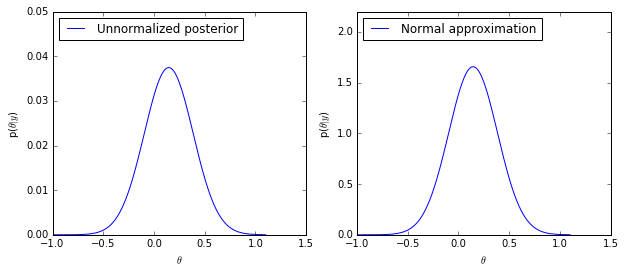

In [98]:
#Plot unnormalized posterior and its normal approximation
from scipy.stats import norm

fig, axes = plt.subplots(1, 2, figsize=(10,4))
theta_x = np.linspace(-1,1.1,1000)
axes[0].plot(theta_x, theta_post(theta_x,n,y,mu,sig),label='Unnormalized posterior')
axes[1].plot(theta_x, norm.pdf(theta_x,mode[0],sd[0]),label='Normal approximation')
axes[0].set_xlabel(r'$\theta$')
axes[0].set_ylabel(r'p($\theta|y$)')
axes[0].set_ylim([0,0.05])
axes[0].legend(loc=2)
axes[1].set_xlabel(r'$\theta$')
axes[1].set_ylabel(r'p($\theta|y$)')
axes[1].set_ylim([0,2.2])
axes[1].legend(loc=2)

In [63]:
#Probability of bias towards head (i.e. probability theta is positive)
prob_heads_1 = 1 - norm.cdf(0,mode[0],sd[0])

#Output results
print('Probability that the coin is biased towards heads: {0}'.format(prob_heads_1[0]))


Probability that the coin is biased towards heads: 0.7264020283143023


### Results Discussion

In this part, we seek to find the posterior distribution through a normal approximation. The parameters of this normal approximation are determined by minimizing the negative log-posterior using the Broyden–Fletcher–Goldfarb–Shanno (BFGS) algorithm that is provided by SciPy. This provides estimates of the mode and variance for the normal approximation.  The unnormalized posterior and the normal approximation to the posterior are both plotted, and it can be seen that the normal approximation is reasonable.

This normal distribution can then be used to determine the probability of bias towards heads based on the observed data. In this case it is found that after observing the data, 

**p(heads|y) = 0.726**

### Question 2  - Part 2
Using the prior density as a proposal density, design a rejection algorithm for sampling from the posterior distribution. Using simulated draws from your algorithm, approximate the probability that the coin is biased toward heads.

In [182]:
#Scale the proposal density -> optimize to find c
from scipy.stats import norm
from scipy.optimize import minimize

#Set parameters/observation
mu = 0
sig = 0.25
n = 5
y = 5

#Define log difference to finid c' -> c' >= log(posterior) - log(proposal)
def calc_diff(theta, n, y, mu, sig):  
    return np.log(theta_post(theta,n,y,mu,sig)) - np.log(norm.pdf(theta,mu,sig))

#Set function to negative for minimization
calc_diff_min = lambda *args: -calc_diff(*args)

#Note that we must use a bounded optimization. 
#Both functions asymptotically approach 0, so we must bound search to prevent divide by 0 error
init_value = 0
bnds = ((-3,8),)   #Note. tuple with only single value (correpsoinding to single unknown theta)
opt = minimize(calc_diff_min, init_value, args=(n, y, mu, sig), method='l-bfgs-b',bounds=bnds)
c = opt.fun[0]


In [183]:
#Define rejection algorithm
def reject(post, Nsim, n, y, mu, sig, c):
       
    # Draw samples from g(theta) - normal distribution
    theta = norm.rvs(mu, sig, size=Nsim)
    
    # Calculate probability under g(theta)
    gvals = np.array([np.log(norm.pdf(t, mu, sig)) for t in theta])

    # Calculate probability under f(theta)
    fvals = np.array([np.log(post(t, n, y, mu, sig)) for t in theta])
    
    # Calculate acceptance probability (log scale)
    p = np.exp(fvals - gvals + c)
    
    return theta[np.random.random(Nsim) < p]

In [ ]:
#Run rejection sampling algorithm
nsamples = 100000
sample = reject(theta_post, nsamples, n, y, mu, sig, c)

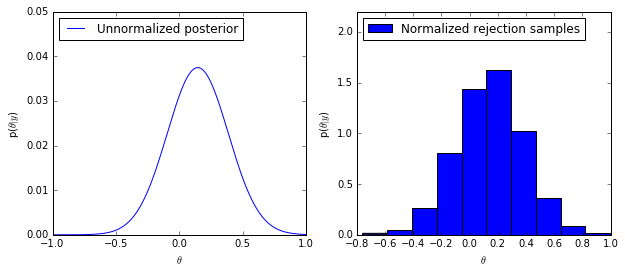

In [191]:
#Plot histogram of samples obtained from rejection algorithm
fig, axes = plt.subplots(1, 2, figsize=(10,4))
theta_x = np.linspace(-1,1,1000)
axes[0].plot(theta_x, theta_post(theta_x,n,y,mu,sig),label='Unnormalized posterior')
_ = axes[1].hist(sample,normed=True,label='Normalized rejection samples')
axes[0].set_xlabel(r'$\theta$')
axes[0].set_ylabel(r'p($\theta|y$)')
axes[0].set_ylim([0,0.05])
axes[0].legend(loc=2)
axes[1].set_xlabel(r'$\theta$')
axes[1].set_ylabel(r'p($\theta|y$)')
axes[1].set_ylim([0,2.2])
axes[1].legend(loc=2)

In [190]:
#Estimate probability of bias towards head from samples
prob_heads_2 = np.size(sample[sample>0]) / np.size(sample)

#Output results
print('Probability that the coin is biased towards heads: {0}'.format(prob_heads_2))


Probability that the coin is biased towards heads: 0.7307366638441999


### Results Discussion

In this part, we seek to approximate the posterior distribution using rejection sampling. The prior distribution for $\theta$ is used as the proposal distribution. The proposal density is scaled by a constant to esnure that the posterior distribution can be completely sampled.  This constant was determined using the Broyden–Fletcher–Goldfarb–Shanno (BFGS) algorithm that is provided by SciPy.

The rejection sampling algorithm is then used to generate samples from the posterior. These samples can then be used to determine the probability of bias towards heads based on the observed data by finding the proportion of samples greater than zero. In this case it is found that after observing the data, 

**p(heads|y) = 0.731** 

### Question 2 - Part 3
Using the prior density as a proposal density, simulate values from the posterior distribution using the SIR algorithm. Approximate the probability that the coin is biased toward heads.

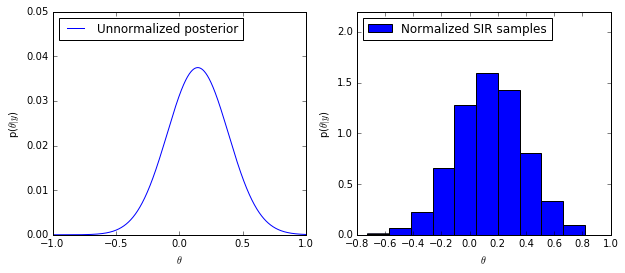

In [194]:
#Perform importance sampling to get particle weights
Nsim = 10000

#Generate samples from the proposal density: theta ~ N(0,0.25)
theta = norm.rvs(mu, sig, size=Nsim)

# Calculate probability under g(theta)
q_theta = np.array([np.log(norm.pdf(t, mu, sig)) for t in theta])

# Calculate probability under f(theta)
f_theta = np.array([np.log(theta_post(t, n, y, mu, sig)) for t in theta])

#Calculate importance weights
w = np.exp(f_theta - q_theta - max(f_theta - q_theta))

#Normalize weights into probabilities
p_sir = w/w.sum()

#Sample w/ replacement using probabilities (i.e. the sampling weights)
theta_sir = theta[np.random.choice(range(len(theta)), size=10000, p=p_sir)]

#Plot histogram of resulting samples
fig, axes = plt.subplots(1, 2, figsize=(10,4))
theta_x = np.linspace(-1,1,1000)
axes[0].plot(theta_x, theta_post(theta_x,n,y,mu,sig),label='Unnormalized posterior')
_ = axes[1].hist(theta_sir,normed=True,label='Normalized SIR samples')
axes[0].set_xlabel(r'$\theta$')
axes[0].set_ylabel(r'p($\theta|y$)')
axes[0].set_ylim([0,0.05])
axes[0].legend(loc=2)
axes[1].set_xlabel(r'$\theta$')
axes[1].set_ylabel(r'p($\theta|y$)')
axes[1].set_ylim([0,2.2])
axes[1].legend(loc=2)


In [196]:
#Estimate probability of bias towards head from samples
prob_heads_3 = np.size(theta_sir[theta_sir>0]) / np.size(theta_sir)

#Output results
print('Probability that the coin is biased towards heads: {0}'.format(prob_heads_3))

Probability that the coin is biased towards heads: 0.7214


### Results Discussion

In this part, we seek to approximate the posterior distribution using the sampling importance resampling (SIR) method. The prior distribution for $\theta$ is used as the proposal distribution. Samples are first generated from the proposal density and assigned weights according to their likelihoods with respect to the porposal distribution and unnormlaized posterior distribution.  These weights are then converted into probabilities to enable resampling with replacement.

These samples obtained from the SIR method can then be used to determine the probability of bias towards heads based on the observed data by finding the proportion of samples greater than zero. In this case it is found that after observing the data, 

**p(heads|y) = 0.721** 

### Question 2 - Overall Results

In question 2, three different methods were used to approximate the posterior distribution.  It should be noted that in this case, the form of the posterior distribution was known (in an unnormalized form), however we were unable to directly sample from it due to the complexity of calcualting the normalizing constant.  The results from these three methods show that the outputs are consistent across all the methods, and this is demonstrated by the close similarity of the plots of the samples distributions and the unnormalized posterior distribution plot.

It was also shown that the results regarding the bias of the observed coin is relatively consistent across all of the methods:

**Part a:  p(heads|y) = 0.726  
Part b:  p(heads|y) = 0.731  
Part c:  p(heads|y) = 0.721**  

Overall, the SIR method is preferred since it does not require the assumptions of the normal approximation and is more computationally efficient than rejection sampling.

# Question 3

The goal of this problem is to investigate the role of the proposal distribution in a Metropolis-Hastings algorithm designed to simulate from the posterior distribution of the mixture parameter $\delta$. 

1. Simulate 200 realizations from the mixture distribution:
    $$y_i \sim \delta N(7, 0.5^2) + (1-\delta) N(10, 0.5^2)$$
    with $\delta = 0.7$. Plot a histogram of these data. 
2. Implement an ABC procedure to simulate from the posterior distribution of $\delta$, using your data from part (1). 
3. Implement a random walk M-H algorithm with proposal $\delta^{\prime} = \delta^{(i)} + \epsilon$ with $\epsilon \sim Unif(−1,1)$. 
4. Reparameterize the problem letting $U = \log\left[\frac{\delta}{1 - \delta}\right]$ and $u^{\prime} = u^{(i)} + \epsilon$. Implement a random walk chain in U-space. 
5. Compare the estimates and convergence behavior of the three algorithms.

In part (1), you are asked to simulate data from a distribution with $\delta$ known. For parts (2)–(4), assume $\delta$ is unknown with prior $\delta \sim Unif( 0,1)$. For parts (2)–(4), provide an appropriate plot and a table summarizing the output of the algorithm. 

To facilitate comparisons, use the same number of iterations, random seed, starting values, and burn-in period for all implementations of the algorithm. 

### Question 3 - Part 1

Simulate 200 realizations from the mixture distribution and plot the histogram.

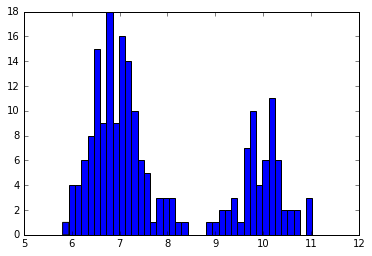

In [204]:
#Set random seed
np.random.seed(77)

# True parameter values
mu_true = np.array([7, 10])
sigma_true = np.array([0.5, 0.5])
delta_true = 0.7
n = 200

# Simulate from each distribution according to mixing proportion psi
z = np.random.binomial(1, 1-delta_true, n)
x = np.random.normal(mu_true[z], sigma_true[z])

_ = plt.hist(x, bins=40)

### Question 3 - Part 2

Implement an ABC procedure to simulate from the posterior distribution of δ, using data from part (1). 

The number of iterations is 1000


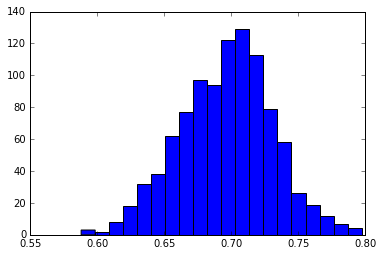

In [205]:
#Set random seed
np.random.seed(77)

#Set total number of required samples
N = 1000
n = 200

#Set threshold
epsilon = [0.05, 0.05]

#ABC procedure to estimate delta
ABC_samps = []
while len(ABC_samps) < N:
    #Simulate from a uniform distribution [0, 1]
    delta = np.random.rand()
    
    z = np.random.binomial(1, 1-delta, n)
    
    data = np.random.normal(mu_true[z], sigma_true[z])
    
    #Check if sample mean and sample std. dev. are within tolerance compared to observed data
    if ((abs(np.mean(data)-np.mean(x)) < epsilon[0]) & (abs(np.std(data)-np.std(x)) < epsilon[1])):
        ABC_samps.append(delta)

_ = plt.hist(ABC_samps, bins = 20)

print ('The number of iterations is {0}'.format(N))

### Question 3 - Part 3

Implement a random walk M-H algorithm with proposal $\delta^{\prime} = \delta^{(i)} + \epsilon$ with $\epsilon \sim Unif(−1,1)$. 

In [206]:
from scipy.stats.distributions import norm

#Set random seed
np.random.seed(77)

rnorm = np.random.normal

def calculate_posterior(theta, data = x):
    #Log-likelihood for given data 
    logp = sum(np.log(theta*norm.pdf(data, mu_true[0], sigma_true[0])
                      +(1-theta)*norm.pdf(data, mu_true[1], sigma_true[1])))
    return logp

def metropolis(n_iterations, initial_values):
    n_params = len(initial_values)
    trace = np.empty((n_iterations+1, n_params))
    trace[0] = initial_values
    current_log_prob = calculate_posterior(*trace[0])
    accepted = [0]*n_params
    
    for i in range(n_iterations):
        if not i%1000: print('Iteration %i' % i)
        
        current_params = trace[i]   
            
        for j in range(n_params):
            p = trace[i].copy()
            
            #Propose new value
            theta = np.random.uniform(-1, 1)
            
            #Insert new value 
            p += theta

            if p>1:
                p = 1
            
            if p<0:
                p = 0
                
            #Calculate log posterior with proposed value
            proposed_log_prob = calculate_posterior(p)
    
            #Log-acceptance rate
            alpha = proposed_log_prob - current_log_prob
    
            #Sample a uniform random variate
            u = np.random.rand()
    
            #Test proposed value
            if np.log(u) < alpha:
                # Accept
                trace[i+1,j] = p
                
                current_log_prob = proposed_log_prob
                accepted[j] += 1
            else:
                #Reject
                trace[i+1,j] = trace[i,j]
                
    return trace, accepted

Iteration 0
Iteration 1000
Iteration 2000
Iteration 3000
Iteration 4000
Iteration 5000
Iteration 6000
Iteration 7000
Iteration 8000
Iteration 9000
Acceptance rate: [ 0.0547]


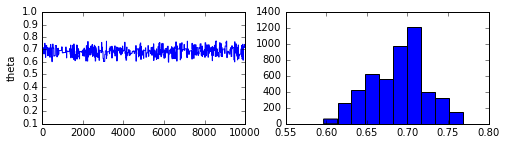

In [207]:
#Run Metropolis algorithm
n_iter = 10000    
trace_1, acc = metropolis(n_iter, [0.1])

for param, samples in zip(['theta'], trace_1.T):
    fig, axes = plt.subplots(1, 2, figsize=(8, 2))
    axes[0].plot(samples)
    axes[0].set_ylabel(param)
    axes[1].hist(samples[int(n_iter/2):])
    
theta_1 = trace_1.T[0][int(n_iter/2):]
print ('Acceptance rate: {0}'.format(np.array(acc, float)/n_iter))

### Question 3 - Part 4

Reparameterize the problem letting $U = \log\left[\frac{\delta}{1 - \delta}\right]$ and $u^{\prime} = u^{(i)} + \epsilon$. Implement a random walk chain in U-space. 

In [208]:
#Set random seed
np.random.seed(42)

rnorm = np.random.normal

def calculate_posterior(u, data = x):
    #Log-likelihood for given data 
    theta = np.exp(u)/(1 + np.exp(u))
    logp = sum(np.log(theta*norm.pdf(data, mu_true[0], sigma_true[0])
                      + (1-theta)*norm.pdf(data, mu_true[1], sigma_true[1])))
    return logp

def metropolis(n_iterations, initial_values):
    n_params = len(initial_values)
    trace = np.empty((n_iterations+1, n_params))
    trace[0] = initial_values
    current_log_prob = calculate_posterior(*trace[0])
    accepted = [0]*n_params
    
    for i in range(n_iterations):
        if not i%1000: print('Iteration %i' % i)
        
        current_params = trace[i]   
            
        for j in range(n_params):
            p = trace[i].copy()
            
            #Propose new value
            eps = np.random.uniform(-1, 1)
            
            #Insert new value 
            p += eps
            
            #Calculate log posterior with proposed value
            proposed_log_prob = calculate_posterior(p)
    
            #Log-acceptance rate
            alpha = proposed_log_prob - current_log_prob
    
            #Sample a uniform random variate
            u = np.random.rand()
    
            #Test proposed value
            if np.log(u) < alpha:
                #Accept
                trace[i+1,j] = p
                
                current_log_prob = proposed_log_prob
                accepted[j] += 1
            else:
                #Reject
                trace[i+1,j] = trace[i,j]
                
    return trace, accepted

Iteration 0
Iteration 1000
Iteration 2000
Iteration 3000
Iteration 4000
Iteration 5000
Iteration 6000
Iteration 7000
Iteration 8000
Iteration 9000
Acceptance rate: [ 0.2471]


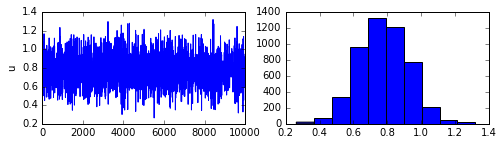

In [209]:
# Run Metropolis algorithm
n_iter = 10000    
trace_2, acc = metropolis(n_iter, [0.4])

for param, samples in zip(['u'], trace_2.T):
    fig, axes = plt.subplots(1, 2, figsize=(8, 2))
    axes[0].plot(samples)
    axes[0].set_ylabel(param)
    axes[1].hist(samples[int(n_iter/2):])
    
print ('Acceptance rate: {0}'.format(np.array(acc, float)/n_iter))

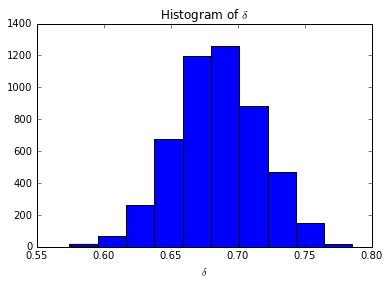

In [211]:
#Calculate the value of theta from u
theta_2 = np.empty((1, n_iter-int(n_iter/2)))
for i in range(n_iter-int(n_iter/2)):
    theta_2[0][i] = np.exp(trace_2.T[0][i])/(1+np.exp(trace_2.T[0][i]))

plt.hist(theta_2[0])
plt.xlabel('$\delta$')
plt.title('Histogram of $\delta$')

### Question 3 - Part 5

Compare the results and convergence behavior of all three methods.

In [235]:
#Comparison of all methods
print ('The statistical summary of the above three different approaches')
percentile = [2.5, 25, 50, 75, 97.5]
print ('The ABC method: {0}, sd is {1}'.format(np.percentile(trace_ABC, percentile), np.std(trace_ABC)))
print ('The MH method 1: {0}, sd is {1}'.format(np.percentile(theta_1, percentile), np.std(theta_1)))
print ('The MH method 2: {0}, sd is {1}'.format(np.percentile(theta_2, percentile), np.std(theta_2)))

The statistical summary of the above three different approaches
The ABC method: [ 0.5968251   0.64687712  0.66971198  0.69605395  0.73921444], sd is 0.03672223445669116
The MH method 1: [ 0.62124777  0.66143293  0.69283477  0.71232604  0.75352837], sd is 0.03449735710774321
The MH method 2: [ 0.62058993  0.66390863  0.68514637  0.70825786  0.7473131 ], sd is 0.03224853297109577


We can see that all of the approaches are fairly similar in their chracterizations of the posteriors based on their distribution percentiles. Based on the a priori knowledge that the "true" value of the parameter is 0.7, we can see that both the MCMC methods provide the most accurate predictions of the true value (if we utilize the posterior means as the point predictions).  However, the second MCMC is clearly more efficient as it has an acceptance rate of 0.2471 compared with 0.0547 for MCMC method 1.  Based on this information, I would select MCMC method 2 as it provides accurate results and demonstrates the most efficient convergence.   

# Question 4

Carlin (1992) considers a Bayesian approach to meta-analysis, and includes the following examples of 22 trials of beta-blockers to prevent mortality after myocardial infarction. These data are given below.

In one possible random effects model we assume the true baseline mean (on a log-odds scale) $m_i$ in a trial $i$
is drawn from some population distribution. Let $r^C_i$ denote number of events in the control group in trial $i$, and $r^T_i$ denote events under active treatment in trial $i$. Our model is:

$$\begin{aligned}
r^C_i &\sim \text{Binomial}\left(p^C_i, n^C_i\right) \\
r^T_i &\sim \text{Binomial}\left(p^T_i, n^T_i\right) \\
\text{logit}\left(p^C_i\right) &= \mu_i \\
\text{logit}\left(p^T_i\right) &= \mu_i + \delta \\
\mu_i &\sim \text{Normal}(m, s).
\end{aligned}$$

In this case, we want to make inferences about the population effect $m$, and the predictive distribution for the effect $\delta_{\text{new}}$ in a new trial. 

This particular model uses a random effect for the population mean, and a fixed effect for the treatment effect. There are 3 other models you could fit to represent all possible combinations of fixed or random effects for these two parameters.

Build all 4 models to estimate the treatment effect in PyMC3 and 

1. use convergence diagnostics to check for convergence in each model 
2. use posterior predictive checks to compare the fit of the models
3. use DIC to compare the models as approximations of the true generating model

Which model would you select and why?

In [3]:
r_t_obs = np.array([3, 7, 5, 102, 28, 4, 98, 60, 25, 138, 64, 45, 9, 57, 25, 33, 28, 8, 6, 32, 27, 22])
n_t_obs = np.array([38, 114, 69, 1533, 355, 59, 945, 632, 278,1916, 873, 263, 291, 858, 154, 207, 251, 151, 174, 209, 391, 680])
r_c_obs = np.array([3, 14, 11, 127, 27, 6, 152, 48, 37, 188, 52, 47, 16, 45, 31, 38, 12, 6, 3, 40, 43, 39])
n_c_obs = np.array([39, 116, 93, 1520, 365, 52, 939, 471, 282, 1921, 583, 266, 293, 883, 147, 213, 122, 154, 134, 218, 364, 674])
N = len(n_c_obs)

In [4]:
#Import required PyMC3 methods
from pymc3 import Normal, Uniform, Binomial, DensityDist, Model, sample
from pymc3.math import invlogit
from pymc3 import traceplot
from pymc3 import *

### Question 4 - Model 1  
**Population Effect:** RANDOM  
**Treatment Effect:**   FIXED

In [42]:
#Create Model 1: Random population effect, fixed treatment effect
with Model() as beta_blocker1:
    m = Normal('m', mu=0, tau=0.001)
    s = Uniform('s', 0, 10)
    mu = Normal('mu', mu=m, tau=s, shape=N)

    delta = Normal('delta', mu=0, tau=0.001)
  
    p_c = invlogit(mu)
    p_t = invlogit(mu+delta)
      
    r_c = Binomial('r_c', n_c_obs, p_c, observed=r_c_obs)
    r_t = Binomial('r_t', n_t_obs, p_t, observed=r_t_obs)

Applied interval-transform to s and added transformed s_interval_ to model.


In [46]:
with beta_blocker1:
    trace1 = sample(2000)

Assigned NUTS to m
Assigned NUTS to s_interval_
Assigned NUTS to mu
Assigned NUTS to delta
100%|██████████| 2000/2000 [00:15<00:00, 129.72it/s]


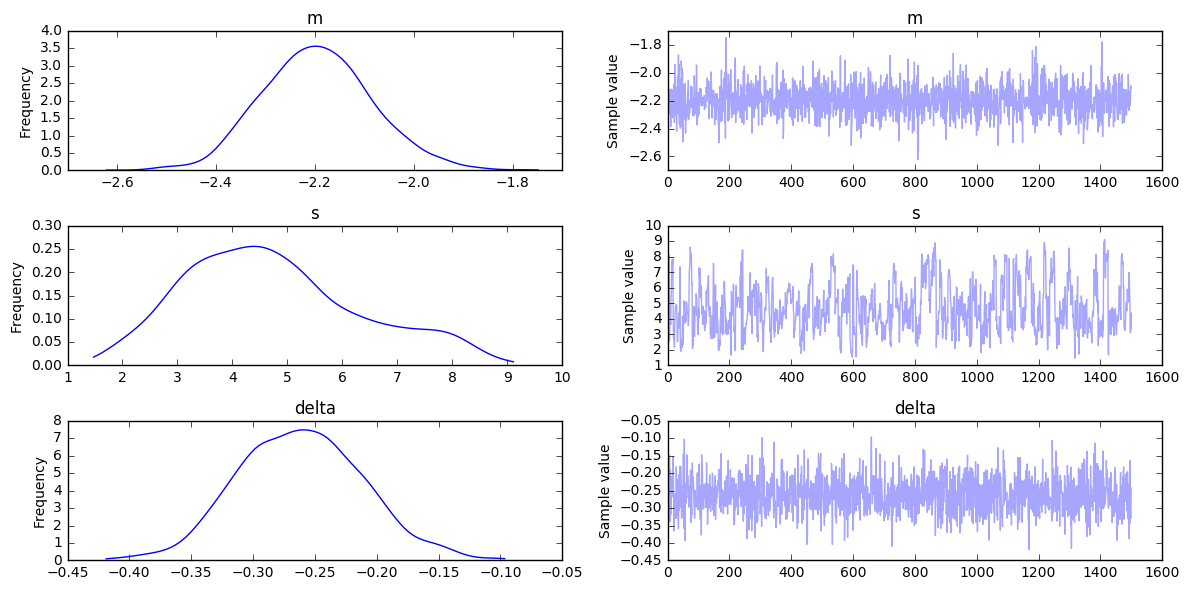

In [9]:
#Plot posteriors for model 1
traceplot(trace1[500:], varnames=['m','s','delta']);

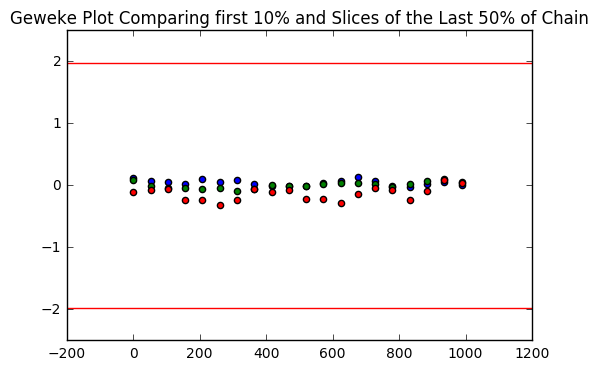

In [10]:
#Convergence Diagnostics for Model 1 (use Geweke score)
conv1a = geweke(trace1['m'])
conv1b = geweke(trace1['delta'])
conv1c = geweke(trace1['s'])

plt.scatter(conv1a[:,0],conv1a[:,1])
plt.scatter(conv1b[:,0],conv1b[:,1],c='g')
plt.scatter(conv1c[:,0],conv1c[:,1],c='r')
plt.axhline(-1.98, c='r')
plt.axhline(1.98, c='r')
plt.ylim(-2.5,2.5)
plt.title('Geweke Plot Comparing first 10% and Slices of the Last 50% of Chain')
plt.show()

In [15]:
#Convergence Diagnostics for Model 1 (Gelman)
with beta_blocker1:
    trace1_conv = sample(2000, njobs=2)
    
gelman_rubin(trace1_conv)

Assigned NUTS to m
Assigned NUTS to s_interval_
Assigned NUTS to mu
Assigned NUTS to delta
100%|██████████| 2000/2000 [00:22<00:00, 89.67it/s]


{'delta': 0.99985659762122048,
 'm': 0.99977044491399747,
 'mu': array([ 0.99982619,  1.00007499,  0.99976962,  0.999832  ,  0.99977972,
         0.99984277,  0.99991261,  0.99975063,  0.99979851,  1.00010048,
         0.99998823,  0.99975337,  1.00036806,  0.99976241,  0.99978239,
         0.99975713,  1.0002956 ,  0.9997501 ,  0.99994224,  0.99975006,
         1.00008071,  1.0000569 ]),
 's': 1.0042641332547184,
 's_interval_': 1.0051149717006804}

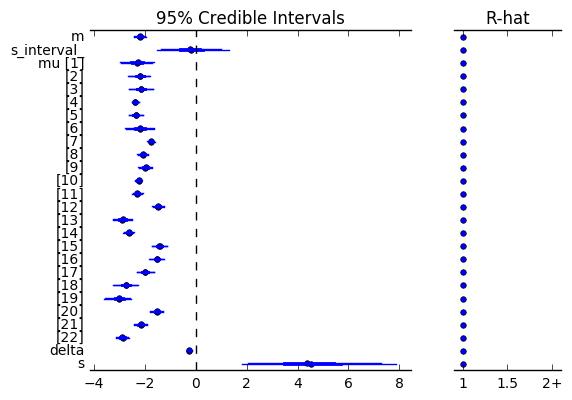

In [16]:
forestplot(trace1_conv)

In [18]:
#Posterior Predictive Checks for Model 1
with beta_blocker1:
    ppc1 = sample_ppc(trace1, samples=500)

100%|██████████| 500/500 [00:05<00:00, 110.75it/s]


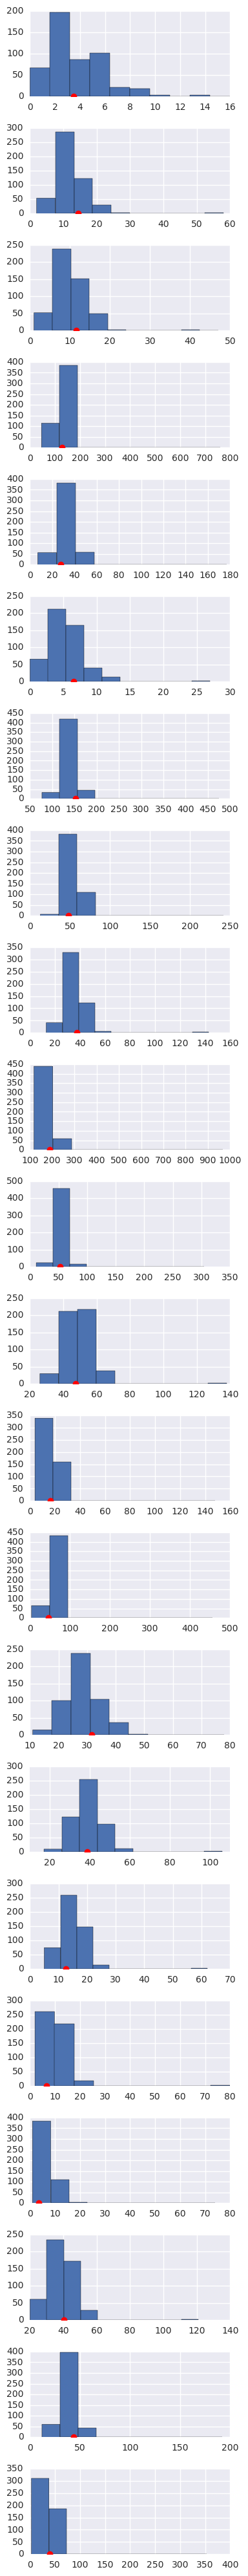

In [73]:
#Posterior Predictive Checks (control)
fig, axes = plt.subplots(22, 1, figsize=(4, 40))

for obs, sim, ax in zip(r_c_obs, ppc1['r_c'].T, axes):
    ax.hist(sim)
    ax.plot(obs+0.5, 0, 'ro')

plt.tight_layout()

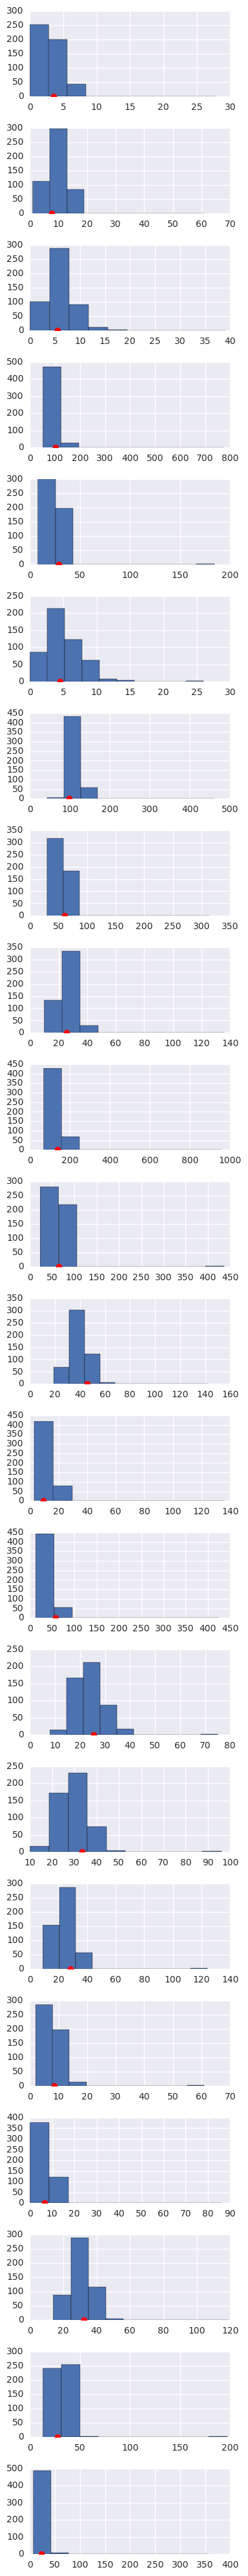

In [72]:
#Posterior Predictive Checks (test)
fig, axes = plt.subplots(22, 1, figsize=(4, 40))

for obs, sim, ax in zip(r_t_obs, ppc1['r_t'].T, axes):
    ax.hist(sim)
    ax.plot(obs+0.5, 0, 'ro')

plt.tight_layout()

In [47]:
#Find DIC for Model 1
model1_DIC = stats.dic(model=beta_blocker1, trace=trace1)
print ('Model 1 DIC score: {0}'.format(model1_DIC))

Model 1 DIC score: 430.6169705746028


### Question 4 - Model 2 
**Population Effect:** RANDOM  
**Treatment Effect:**  RANDOM

In [6]:
#Create Model 2: Random population effect, random treatment effect
with Model() as beta_blocker2:
    m = Normal('m', mu=0, tau=0.001)
    s = Uniform('s', 0, 10)
    mu = Normal('mu', mu=m, tau=s, shape=N)

    m_d = Normal('m_d', mu=0, tau=0.001)
    s_d = Uniform('s_d', 0, 160)
    delta = Normal('delta', mu=m_d, tau=s_d,shape=N)
  
    p_c = invlogit(mu)
    p_t = invlogit(mu+delta)
    
    r_c = Binomial('r_c', n_c_obs, p_c, observed=r_c_obs)
    r_t = Binomial('r_t', n_t_obs, p_t, observed=r_t_obs)

Applied interval-transform to s and added transformed s_interval_ to model.
Applied interval-transform to s_d and added transformed s_d_interval_ to model.


In [7]:
with beta_blocker2:
    trace2 = sample(2000)

Assigned NUTS to m
Assigned NUTS to s_interval_
Assigned NUTS to mu
Assigned NUTS to m_d
Assigned NUTS to s_d_interval_
Assigned NUTS to delta
100%|██████████| 2000/2000 [00:30<00:00, 65.47it/s]


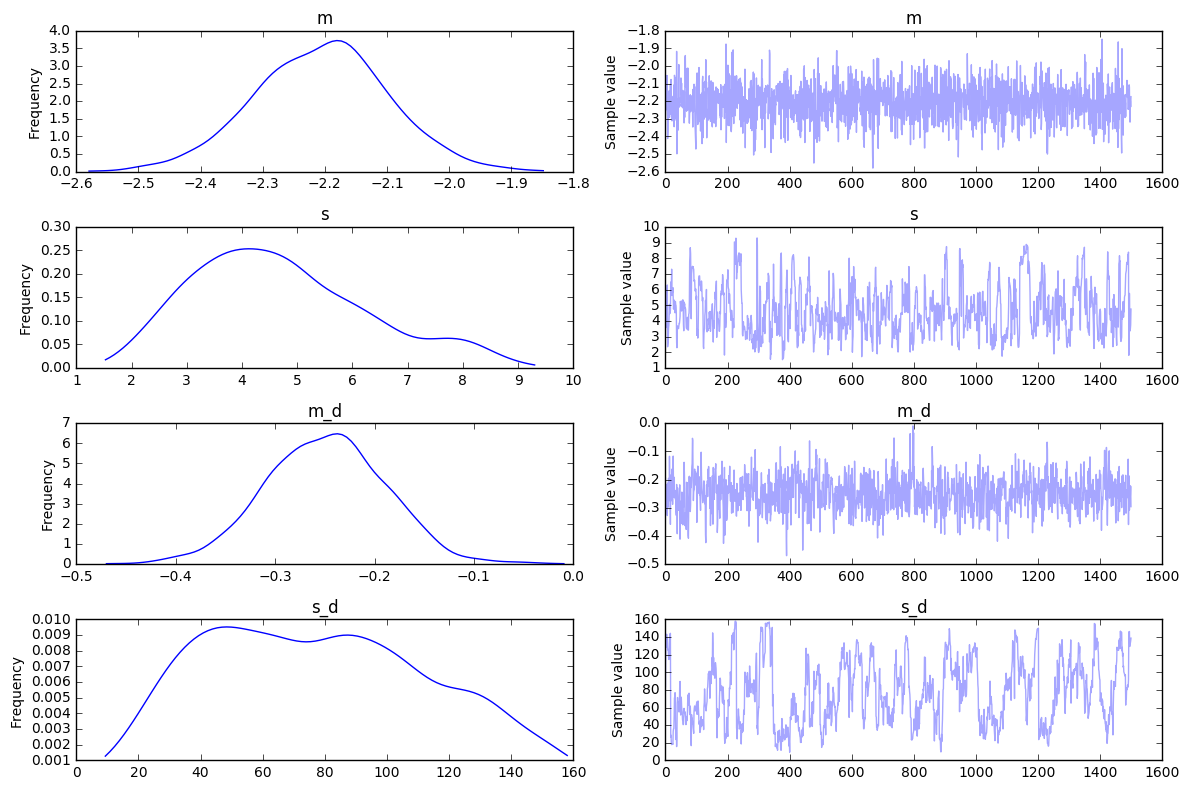

In [8]:
#Plot posteriors for model 2
traceplot(trace2[500:], varnames=['m','s','m_d','s_d']);

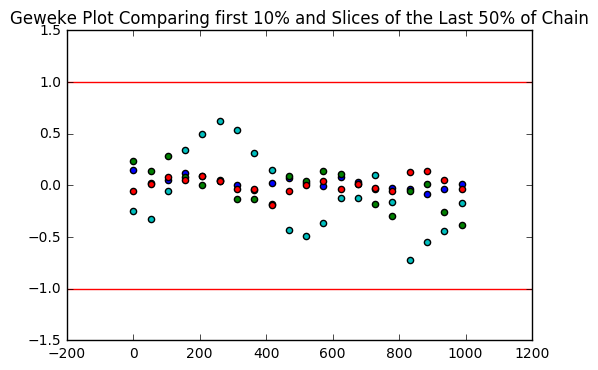

In [11]:
#Convergence Diagnostics for Model 2 (use Geweke score)
conv2a = geweke(trace2['m'])
conv2b = geweke(trace2['s'])
conv2c = geweke(trace2['m_d'])
conv2d = geweke(trace2['s_d'])

plt.scatter(conv2a[:,0],conv2a[:,1])
plt.scatter(conv2b[:,0],conv2b[:,1],c='g')
plt.scatter(conv2c[:,0],conv2c[:,1],c='r')
plt.scatter(conv2d[:,0],conv2d[:,1],c='c')
plt.axhline(-1, c='r')
plt.axhline(1, c='r')
plt.ylim(-1.5,1.5)
plt.title('Geweke Plot Comparing first 10% and Slices of the Last 50% of Chain')
plt.show()

In [12]:
#Convergence Diagnostics for Model 2 (Gelman)
with beta_blocker2:
    trace2_conv = sample(2000, njobs=2)
    
gelman_rubin(trace2_conv)

Assigned NUTS to m
Assigned NUTS to s_interval_
Assigned NUTS to mu
Assigned NUTS to m_d
Assigned NUTS to s_d_interval_
Assigned NUTS to delta
100%|██████████| 2000/2000 [00:55<00:00, 35.76it/s]


{'delta': array([ 1.00029523,  0.99999415,  0.99992649,  0.99991255,  0.99975808,
         0.99995343,  0.99975003,  1.000633  ,  1.00038548,  0.99974997,
         0.99975053,  0.99986175,  0.99990383,  1.00084648,  0.99983811,
         0.99979915,  0.99997027,  1.00205255,  1.00233208,  0.99975717,
         0.99979851,  0.99979961]),
 'm': 0.99980024391949573,
 'm_d': 1.0017315983183939,
 'mu': array([ 1.00001614,  1.00014697,  0.99978858,  0.99988549,  0.99975117,
         1.00081953,  0.9999472 ,  0.99975263,  1.00005815,  1.00004326,
         0.99992799,  0.99983996,  1.00007228,  1.00020561,  0.99996839,
         0.9997573 ,  0.99975157,  1.00130662,  1.00342233,  0.99975214,
         0.99984642,  0.99979611]),
 's': 1.0011692627425095,
 's_d': 1.0011285203792475,
 's_d_interval_': 1.0024305543302399,
 's_interval_': 1.0019362640364329}

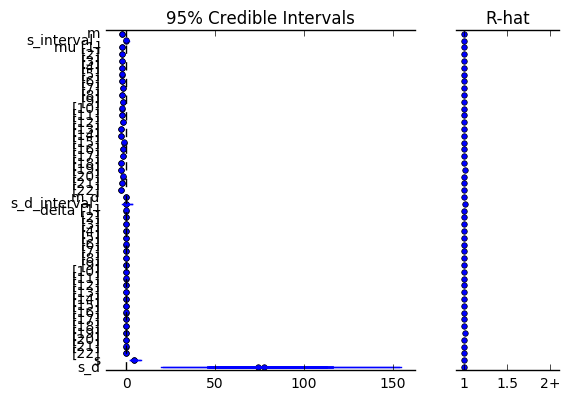

In [14]:
forestplot(trace2_conv)

In [15]:
#Posterior Predictive Checks for Model 2
with beta_blocker2:
    ppc2 = sample_ppc(trace2, samples=500)

100%|██████████| 500/500 [00:05<00:00, 83.42it/s] 


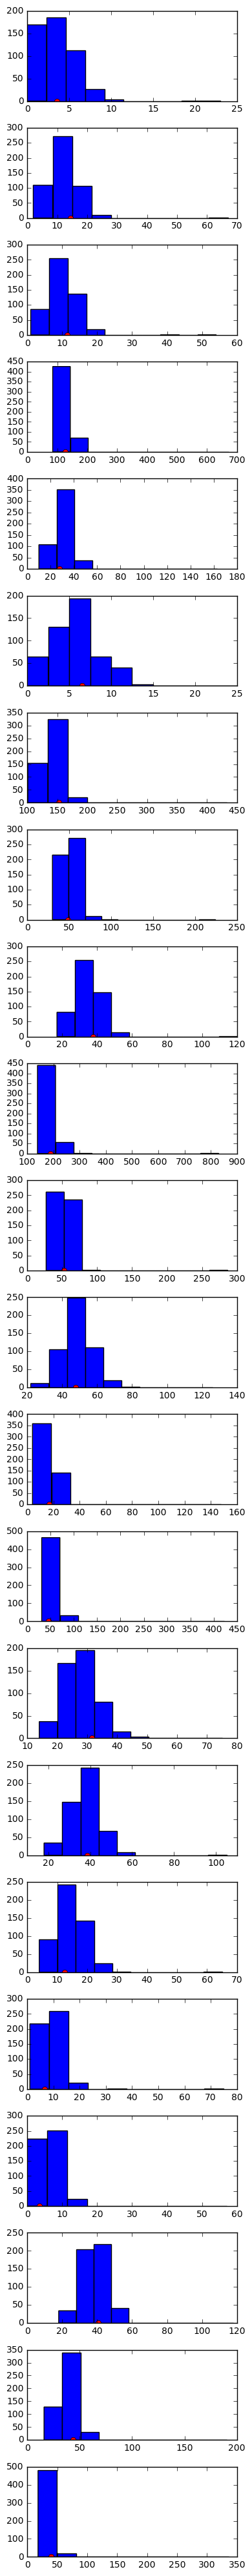

In [16]:
#Posterior Predictive Checks (control)
fig, axes = plt.subplots(22, 1, figsize=(4, 40))

for obs, sim, ax in zip(r_c_obs, ppc2['r_c'].T, axes):
    ax.hist(sim)
    ax.plot(obs+0.5, 0, 'ro')

plt.tight_layout()

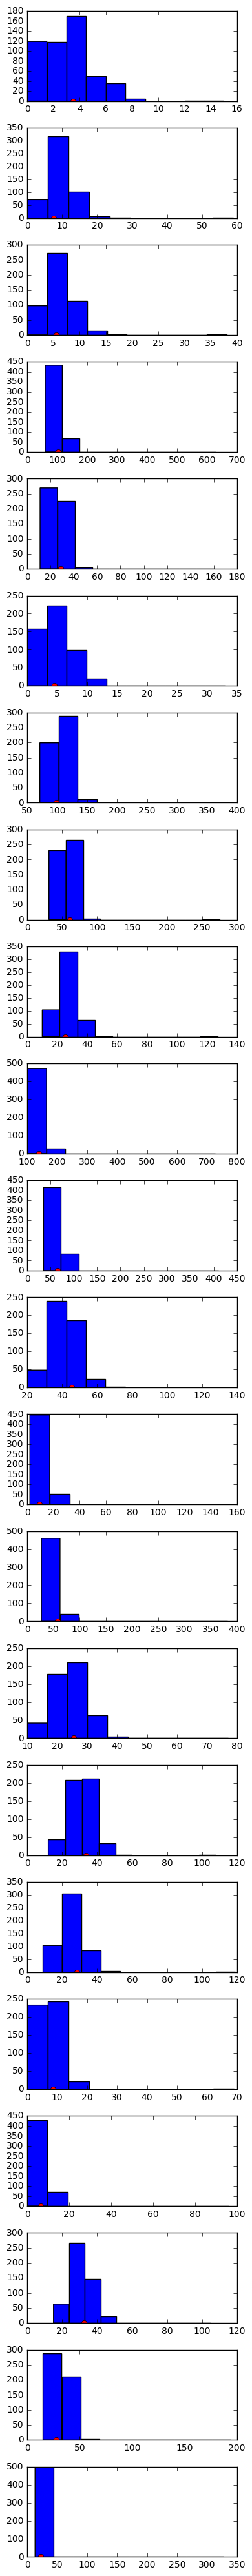

In [17]:
#Posterior Predictive Checks (test)
fig, axes = plt.subplots(22, 1, figsize=(4, 40))

for obs, sim, ax in zip(r_t_obs, ppc2['r_t'].T, axes):
    ax.hist(sim)
    ax.plot(obs+0.5, 0, 'ro')

plt.tight_layout()

In [18]:
#Find DIC for Model 2
model2_DIC = stats.dic(model=beta_blocker2, trace=trace2)
print ('Model 2 DIC score: {0}'.format(model2_DIC))

Model 2 DIC score: 363.88759760386927


### Question 4 - Model 3
**Population Effect:** FIXED  
**Treatment Effect:**  RANDOM

In [20]:
#Create Model 3: Fixed population effect, random treatment effect
with Model() as beta_blocker3:
    mu = Normal('mu', mu=0, tau=0.001)

    m_d = Normal('m_d', mu=0, tau=0.001)
    s_d = Uniform('s_d', 0, 160)
    delta = Normal('delta', mu=m_d, tau=s_d, shape=N)
  
    p_c = invlogit(mu)
    p_t = invlogit(mu+delta)
    
    r_c = Binomial('r_c', n_c_obs, p_c, observed=r_c_obs)
    r_t = Binomial('r_t', n_t_obs, p_t, observed=r_t_obs)

Applied interval-transform to s_d and added transformed s_d_interval_ to model.


In [21]:
with beta_blocker3:
    trace3 = sample(2000)

Assigned NUTS to mu
Assigned NUTS to m_d
Assigned NUTS to s_d_interval_
Assigned NUTS to delta
100%|██████████| 2000/2000 [00:24<00:00, 80.41it/s]


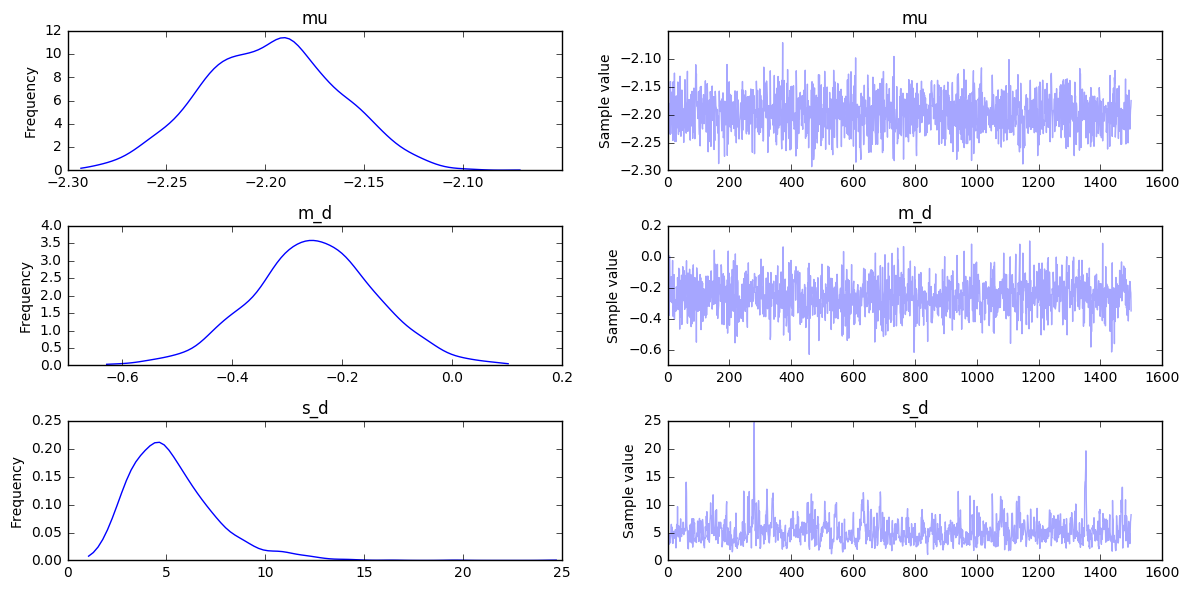

In [22]:
#Plot posteriors for model 3
traceplot(trace3[500:], varnames=['mu','m_d','s_d']);

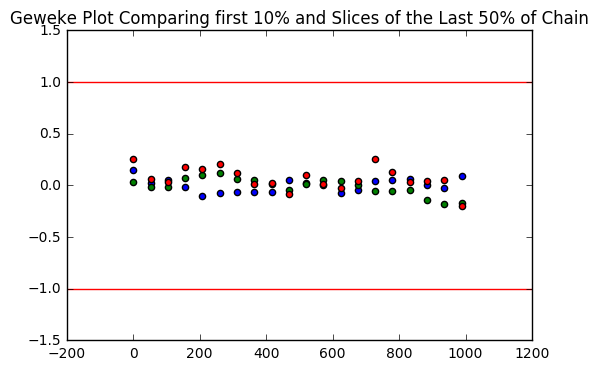

In [24]:
#Convergence Diagnostics for Model 3 (use Geweke score)
conv3a = geweke(trace3['mu'])
conv3b = geweke(trace3['m_d'])
conv3c = geweke(trace3['s_d'])

plt.scatter(conv3a[:,0],conv3a[:,1])
plt.scatter(conv3b[:,0],conv3b[:,1],c='g')
plt.scatter(conv3c[:,0],conv3c[:,1],c='r')
plt.axhline(-1, c='r')
plt.axhline(1, c='r')
plt.ylim(-1.5,1.5)
plt.title('Geweke Plot Comparing first 10% and Slices of the Last 50% of Chain')
plt.show()

In [26]:
#Convergence Diagnostics for Model 3 (Gelman)
with beta_blocker3:
    trace3_conv = sample(2000, njobs=2)
    
gelman_rubin(trace3_conv)

Assigned NUTS to mu
Assigned NUTS to m_d
Assigned NUTS to s_d_interval_
Assigned NUTS to delta
100%|██████████| 2000/2000 [00:49<00:00, 40.26it/s]


{'delta': array([ 1.00120948,  0.99979136,  1.00017289,  0.99993337,  0.99980146,
         0.99975552,  0.99978283,  0.99978635,  0.99989229,  0.99974998,
         0.99998955,  0.99980124,  0.99978096,  0.9998745 ,  0.9997725 ,
         0.99976139,  0.99983009,  0.99976739,  0.99977589,  0.99986888,
         0.99976103,  0.99975216]),
 'm_d': 0.99980599369424006,
 'mu': 0.99996153059108983,
 's_d': 0.99979865625227804,
 's_d_interval_': 0.99976550049113211}

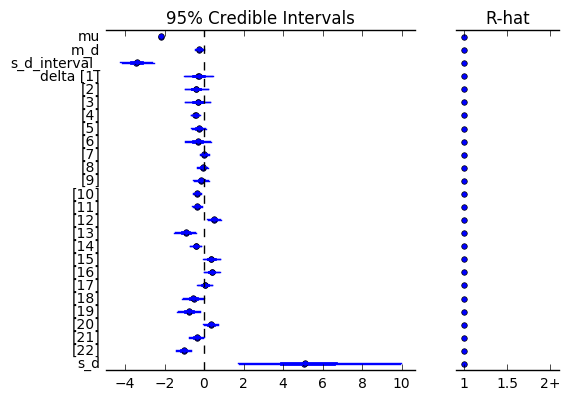

In [27]:
forestplot(trace3_conv)

In [28]:
#Posterior Predictive Checks for Model 3
with beta_blocker3:
    ppc3 = sample_ppc(trace3, samples=500)

100%|██████████| 500/500 [00:06<00:00, 73.21it/s]


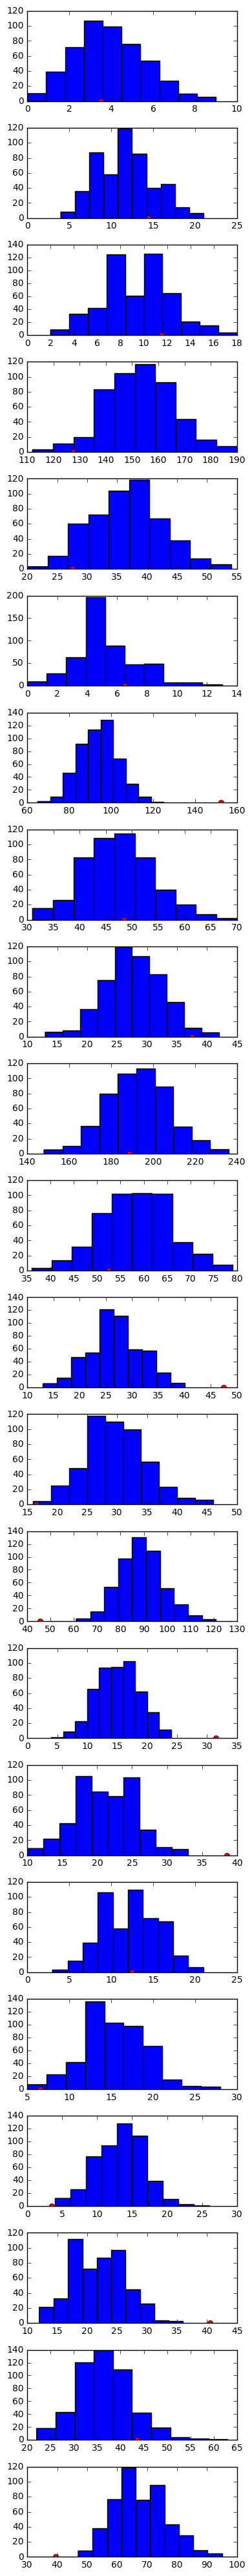

In [29]:
#Posterior Predictive Checks (control)
fig, axes = plt.subplots(22, 1, figsize=(4, 40))

for obs, sim, ax in zip(r_c_obs, ppc3['r_c'].T, axes):
    ax.hist(sim)
    ax.plot(obs+0.5, 0, 'ro')

plt.tight_layout()

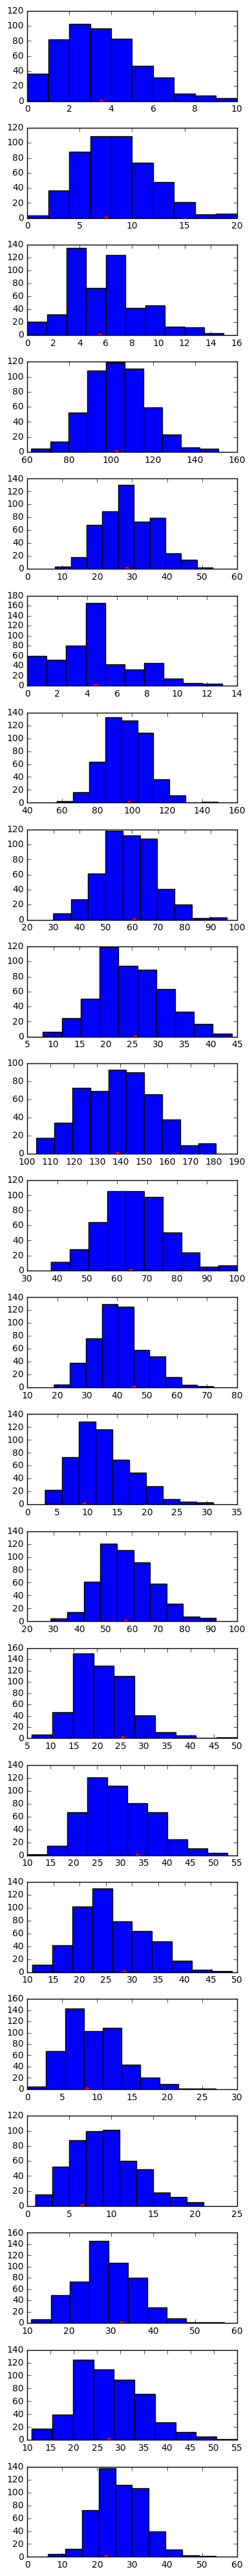

In [30]:
#Posterior Predictive Checks (test)
fig, axes = plt.subplots(22, 1, figsize=(4, 40))

for obs, sim, ax in zip(r_t_obs, ppc3['r_t'].T, axes):
    ax.hist(sim)
    ax.plot(obs+0.5, 0, 'ro')

plt.tight_layout()

In [31]:
#Find DIC for Model 3
model3_DIC = stats.dic(model=beta_blocker3, trace=trace3)
print ('Model 3 DIC score: {0}'.format(model3_DIC))

Model 3 DIC score: 562.945734257954


### Question 4 - Model 4
**Population Effect:** FIXED  
**Treatment Effect:**  FIXED

In [32]:
#Create Model 4: Fixed population effect, fixed treatment effect
with Model() as beta_blocker4:
    mu = Normal('mu', mu=0, tau=0.001)

    delta = Normal('delta', mu=0, tau=0.001)
    
    p_c = invlogit(mu)
    p_t = invlogit(mu+delta)
    
    r_c = Binomial('r_c', n_c_obs, p_c, observed=r_c_obs)
    r_t = Binomial('r_t', n_t_obs, p_t, observed=r_t_obs)

In [33]:
with beta_blocker4:
    trace4 = sample(2000)

Assigned NUTS to mu
Assigned NUTS to delta
100%|██████████| 2000/2000 [00:02<00:00, 668.92it/s]


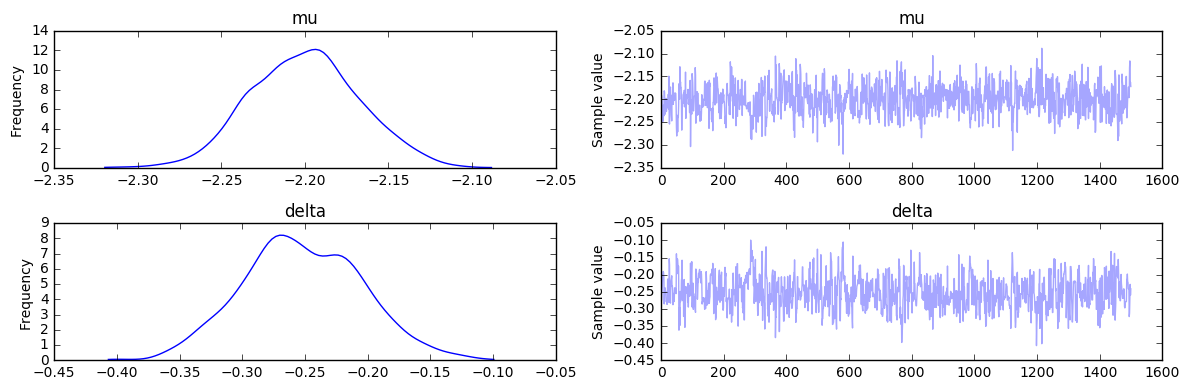

In [34]:
#Plot posteriors for model 4
traceplot(trace4[500:], varnames=['mu','delta']);

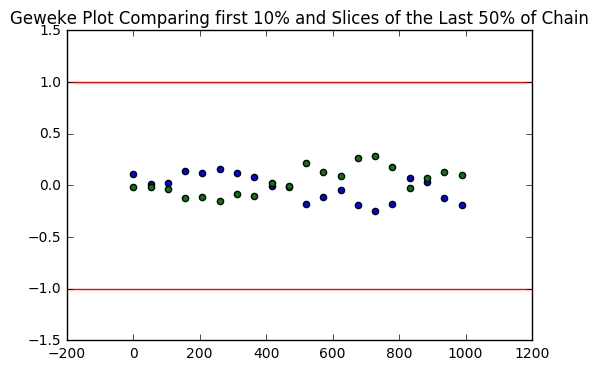

In [35]:
#Convergence Diagnostics for Model 4 (use Geweke score)
conv4a = geweke(trace4['mu'])
conv4b = geweke(trace4['delta'])

plt.scatter(conv4a[:,0],conv4a[:,1])
plt.scatter(conv4b[:,0],conv4b[:,1],c='g')
plt.axhline(-1, c='r')
plt.axhline(1, c='r')
plt.ylim(-1.5,1.5)
plt.title('Geweke Plot Comparing first 10% and Slices of the Last 50% of Chain')
plt.show()

In [36]:
#Convergence Diagnostics for Model 4 (Gelman)
with beta_blocker4:
    trace4_conv = sample(2000, njobs=2)
    
gelman_rubin(trace4_conv)

Assigned NUTS to mu
Assigned NUTS to delta
100%|██████████| 2000/2000 [00:05<00:00, 352.82it/s]


{'delta': 1.0018445101803384, 'mu': 0.99989317040748416}

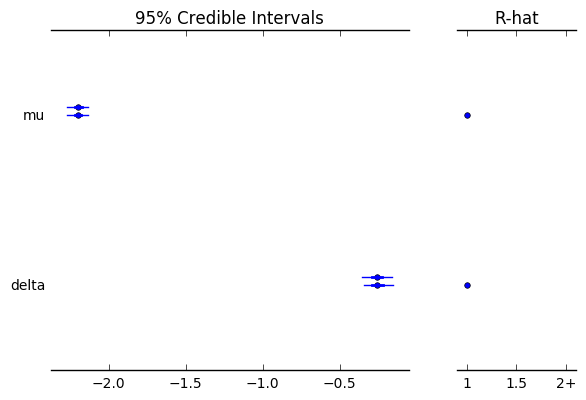

In [37]:
forestplot(trace4_conv)

In [38]:
#Posterior Predictive Checks for Model 4
with beta_blocker4:
    ppc4 = sample_ppc(trace4, samples=500)

100%|██████████| 500/500 [00:05<00:00, 91.15it/s] 


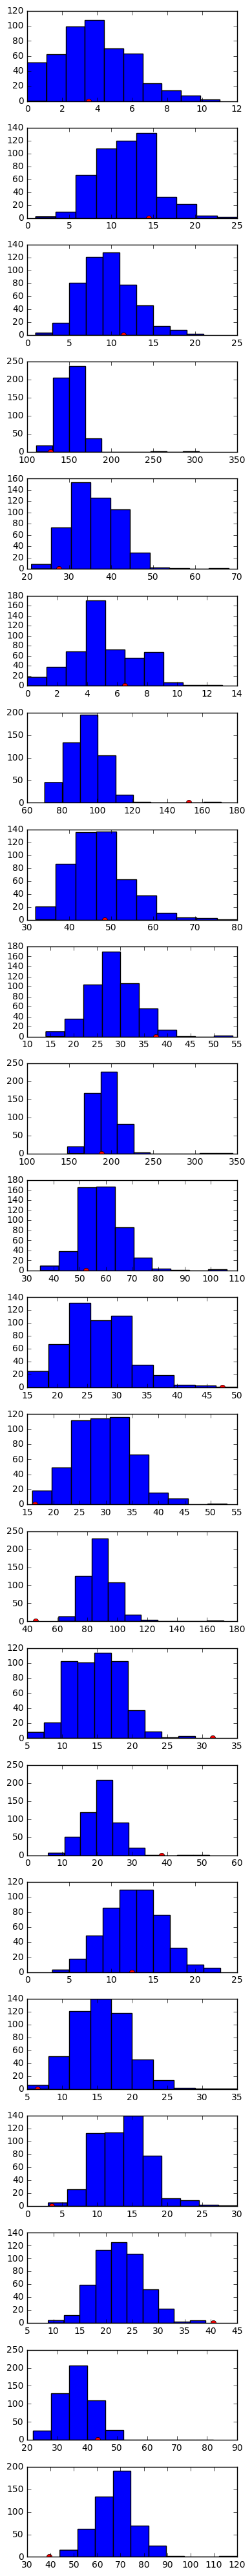

In [39]:
#Posterior Predictive Checks (control)
fig, axes = plt.subplots(22, 1, figsize=(4, 40))

for obs, sim, ax in zip(r_c_obs, ppc4['r_c'].T, axes):
    ax.hist(sim)
    ax.plot(obs+0.5, 0, 'ro')

plt.tight_layout()

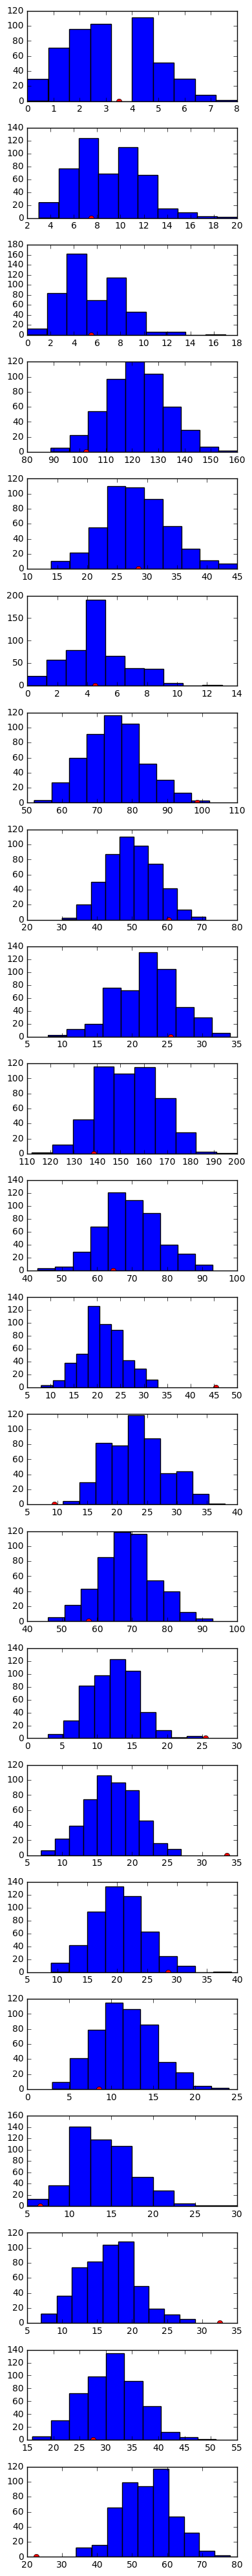

In [40]:
#Posterior Predictive Checks (test)
fig, axes = plt.subplots(22, 1, figsize=(4, 40))

for obs, sim, ax in zip(r_t_obs, ppc4['r_t'].T, axes):
    ax.hist(sim)
    ax.plot(obs+0.5, 0, 'ro')

plt.tight_layout()

In [41]:
#Find DIC for Model 4
model4_DIC = stats.dic(model=beta_blocker4, trace=trace4)
print ('Model 4 DIC score: {0}'.format(model4_DIC))

Model 4 DIC score: 576.4032481309737


### Model Selection
The best model can be selected based on the comparison of the DIC scores.  We seek the model with the smallest DIC score.

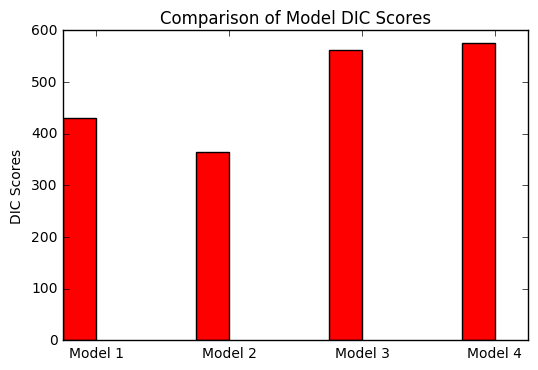

In [48]:
N = 4
model_dic = (model1_DIC, model2_DIC, model3_DIC, model4_DIC)

ind = np.arange(N)  # the x locations for the groups
width = 0.25       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, model_dic, width, color='r')

# add some text for labels, title and axes ticks
ax.set_ylabel('DIC Scores')
ax.set_title('Comparison of Model DIC Scores')
ax.set_xticks(ind + width)
ax.set_xticklabels(('Model 1', 'Model 2', 'Model 3', 'Model 4'))
plt.show()

### Discussion
We can see from the above results that all of the models demonstrate adequate convergence considering both the Geweke and Gelman metrics.  To comment on goodness of fit, we performed posterior predictive checks to compare the model outputs with the actual observed outputs.  It was found that Model 1 and Model 2 performed well in the posterior predictive checks, but Model and Model 4 had several observation points falling outside the likely region of the posterior, indicating that the models may be questionable.

For model selection, we can initially remove Model 3 and Model 4 sicne the posterior predictive checks indicate that they may be poor models.  AS a basis for comparison between models, we can use the DIC score. It can be seen in the above plot, that on the basis of the DIC scores, Model 2 (Random population effects, random treatment effects) should be selected.